<a href="https://colab.research.google.com/github/hinsley/colabs/blob/master/Coronavirus_Projections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

def sigmoid(x, a=1, b=1, c=1):
  """
  Args:
  - x: Time input.
  - a: Horizontal translation (positive: right).
  - b: Vertical scalar.
  - c: Horizontal scalar.
  """
  
  return b * (1-1/(1+np.exp(c * (x - a))))

In [0]:
# This data begins at February 2, 2020 and is collected from Johns Hopkins
# University's live Coronavirus map.
# https://coronavirus.jhu.edu/map.html

cases_china = np.array([
  17.2e3,   # 2020-02-02
  19.7e3,   # 2020-02-03
  23.7e3,   # 2020-02-04
  27.4e3,   # 2020-02-05
  30.6e3,   # 2020-02-06
  34.1e3,   # 2020-02-07
  36.8e3,   # 2020-02-08
  39.8e3,   # 2020-02-09
  42.3e3,   # 2020-02-10
  44.3e3,   # 2020-02-11
  44.7e3,   # 2020-02-12
  59.8e3,   # 2020-02-13
  66.3e3,   # 2020-02-14
  68.3e3,   # 2020-02-15
  70.4e3,   # 2020-02-16
  72.4e3,   # 2020-02-17
  74.1e3,   # 2020-02-18
  74.5e3,   # 2020-02-19
  75.0e3,   # 2020-02-20
  75.5e3,   # 2020-02-21
  76.9e3,   # 2020-02-22
  76.9e3,   # 2020-02-23
  77.2e3,   # 2020-02-24
  77.7e3,   # 2020-02-25
  78.1e3,   # 2020-02-26
  78.5e3,   # 2020-02-27
  78.8e3,   # 2020-02-28
  79.3e3,   # 2020-02-29
  79.8e3,   # 2020-03-01
  80.0e3,   # 2020-03-02
  80.2e3,   # 2020-03-03
  80.3e3,   # 2020-03-04
  80.4e3,   # 2020-03-05
  80.6e3,   # 2020-03-06
  80.7e3,   # 2020-03-07
  80.7e3,   # 2020-03-08
  80.7e3,   # 2020-03-09
  80.8e3,   # 2020-03-10
  80.9e3,   # 2020-03-11
  80.9e3,   # 2020-03-12
  80.9e3,   # 2020-03-13
  81.0e3,   # 2020-03-14
  81.0e3,   # 2020-03-15
])

cases_not_china = np.array([
  18.3e1,   # 2020-02-02
  18.8e1,   # 2020-02-03
  21.2e1,   # 2020-02-04
  22.7e1,   # 2020-02-05
  26.5e1,   # 2020-02-06
  31.7e1,   # 2020-02-07
  34.3e1,   # 2020-02-08
  36.1e1,   # 2020-02-09
  45.7e1,   # 2020-02-10
  47.6e1,   # 2020-02-11
  52.3e1,   # 2020-02-12
  53.8e1,   # 2020-02-13
  59.5e1,   # 2020-02-14
  68.5e1,   # 2020-02-15
  78.0e1,   # 2020-02-16
  89.6e1,   # 2020-02-17
  10.0e2,   # 2020-02-18
  11.0e2,   # 2020-02-19
  12.0e2,   # 2020-02-20
  14.0e2,   # 2020-02-21
  17.0e2,   # 2020-02-22
  20.0e2,   # 2020-02-23
  24.0e2,   # 2020-02-24
  28.0e2,   # 2020-02-25
  33.0e2,   # 2020-02-26
  43.0e2,   # 2020-02-27
  53.0e2,   # 2020-02-28
  68.0e2,   # 2020-02-29
  85.0e2,   # 2020-03-01
  10.3e3,   # 2020-03-02
  12.7e3,   # 2020-03-03
  14.9e3,   # 2020-03-04
  17.5e3,   # 2020-03-05
  21.2e3,   # 2020-03-06
  25.2e3,   # 2020-03-07
  29.1e3,   # 2020-03-08
  32.8e3,   # 2020-03-09
  37.8e3,   # 2020-03-10
  44.9e3,   # 2020-03-11
  47.4e3,   # 2020-03-12
  63.6e3,   # 2020-03-13
  75.1e3,   # 2020-03-14
  81.7e3,   # 2020-03-15
])

In [0]:
from matplotlib import pyplot as plt

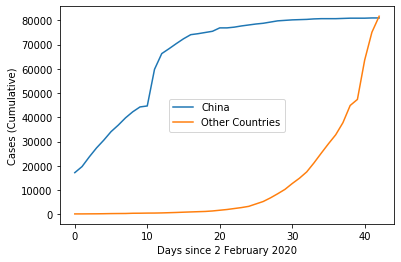

In [50]:
plt.plot(cases_china, label="China")
plt.plot(cases_not_china, label="Other Countries")

plt.xlabel("Days since 2 February 2020")
plt.ylabel("Cases (Cumulative)")
plt.legend()

plt.show()

In [0]:
from scipy.optimize import curve_fit

# Calculate curve fit for cases *outside* of China.
initial_guesses = [0, 0, 0]
popt, pcov = curve_fit(sigmoid, *zip(*enumerate(cases_not_china)), p0=initial_guesses)
curve_not_china = lambda x: sigmoid(x, *popt)

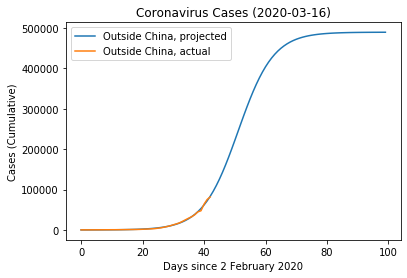

In [62]:
from datetime import date

plt.plot([curve_not_china(x) for x in range(100)], label="Outside China, projected")
plt.plot(cases_not_china, label="Outside China, actual")

plt.title(f"Coronavirus Cases ({date.today()})")
plt.xlabel("Days since 2 February 2020")
plt.ylabel("Cases (Cumulative)")
plt.legend()

plt.show()

In [63]:
popt

array([5.11065739e+01, 4.89448003e+05, 1.74291877e-01])

# Finding projective maximum spread rate

$\sigma = b \left(1 - \frac{1}{1 + e^{c(x - a)}}\right)$

The maximum spread rate can be found by the spread rate $\sigma_x(x_\text{inflection})$ where
$\sigma_{xx}(x_\text{inflection}) = 0$.

$\sigma_x = -b \frac{\partial}{\partial x} \frac{1}{1+e^{c(x-a)}}$

$= b \frac{1}{(1+e^{c(x-a)})^2} \frac{\partial}{\partial x}(1+e^{c(x-a)})$

$= \frac{b}{(1+e^{c(x-a)})^2e^{ac}} \frac{\partial}{\partial x}(e^{cx})$

$= bc \frac{e^{c(x-a)}}{(1+e^{c(x-a)})^2}$

$= bc \frac{1 + e^{c(x-a)} - 1}{(1+e^{c(x-a)})^2}$

$= bc \left( \frac{1}{1 + e^{c(x-a)}} - \frac{1}{(1+e^{c(x-a)})^2} \right)$

$= bc \frac{1}{1+e^{c(x-a)}} \left( 1 - \frac{1}{1+e^{c(x-a)}} \right)$

$\sigma_x = \frac{c}{b} \sigma (b - \sigma)$

$\sigma_{xx} = \frac{c}{b} \frac{\partial}{\partial x}\left[\sigma(b-\sigma)\right]$

$= \frac{c}{b} \left[ \sigma_x (b - \sigma) - \sigma \sigma_{x} \right]$

$\sigma_{xx} = c (\sigma_x - \frac{2}{b}\sigma \sigma_x)$

From this derivation we can tell that the following equation must be true at the inflection point:

$\sigma_x = \frac{2}{b} \sigma \sigma_x$

$\sigma = \frac{b}{2}$

Returning to our definition of $\sigma$, we now have that:

$e^{c(x-a)} = 1$

and thus $x = a$, indicating that the maximum spread rate will be $\sigma_x(a)$.


In [0]:
a, b, c = popt

sigma = sigmoid(a, *popt)

sigma_x = c/b * sigma * (b - sigma)

max_daily_growth_rate = int(sigma_x)

In [85]:
from datetime import datetime, timedelta

day_zero = datetime(2020, 2, 2, 0, 0)
max_growth_date = day_zero + timedelta(days=int(a))

print(f"Maximum Projected Growth Rate: {max_daily_growth_rate} new cases on {max_growth_date.strftime('%d %B %Y')}.")

Maximum Projected Growth Rate: 21326 new cases on 24 March 2020.
